In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
url = 'https://raw.githubusercontent.com/apoc4080/ids_project/aa62167f28081e976b6b11bbc14c299852637512/dataset2.csv'

dataset = pd.read_csv(url)
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,11,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,11,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,10,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,11,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,10,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
dataset.shape

(309, 16)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,10.524272,0.500221,10.0,10.0,11.0,11.0,11.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [ ]:
dataset.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

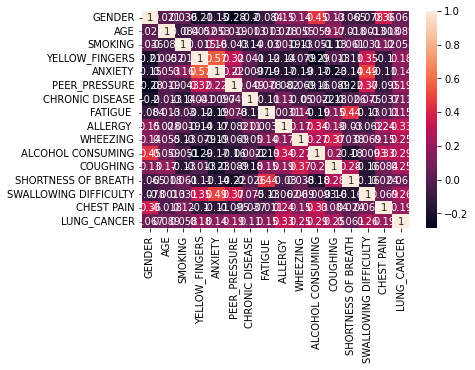

In [ ]:
sns.heatmap(dataset.corr(),annot = True)
plt.show()

Data Visualization

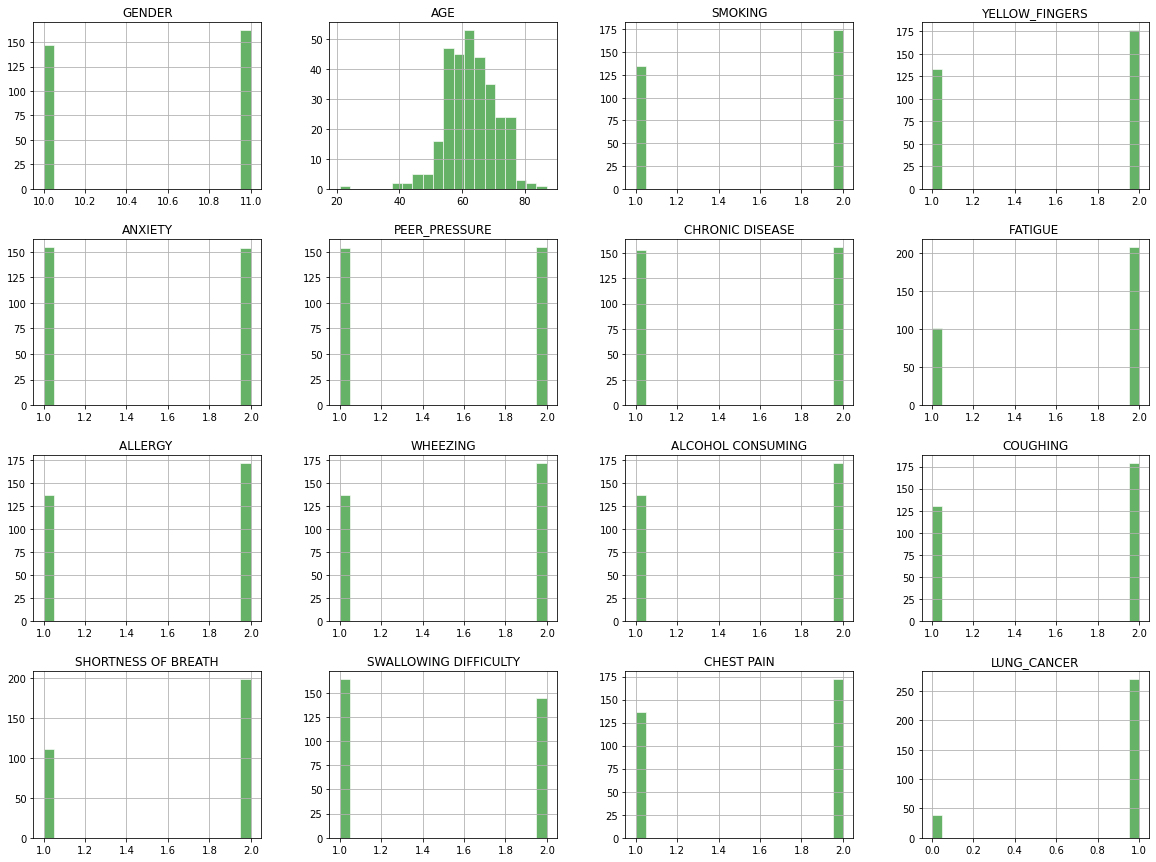

In [ ]:
dataset.hist(figsize=(20,15),ec='white',bins=20,color='green',alpha=0.6)
plt.show()

<Figure size 720x360 with 0 Axes>

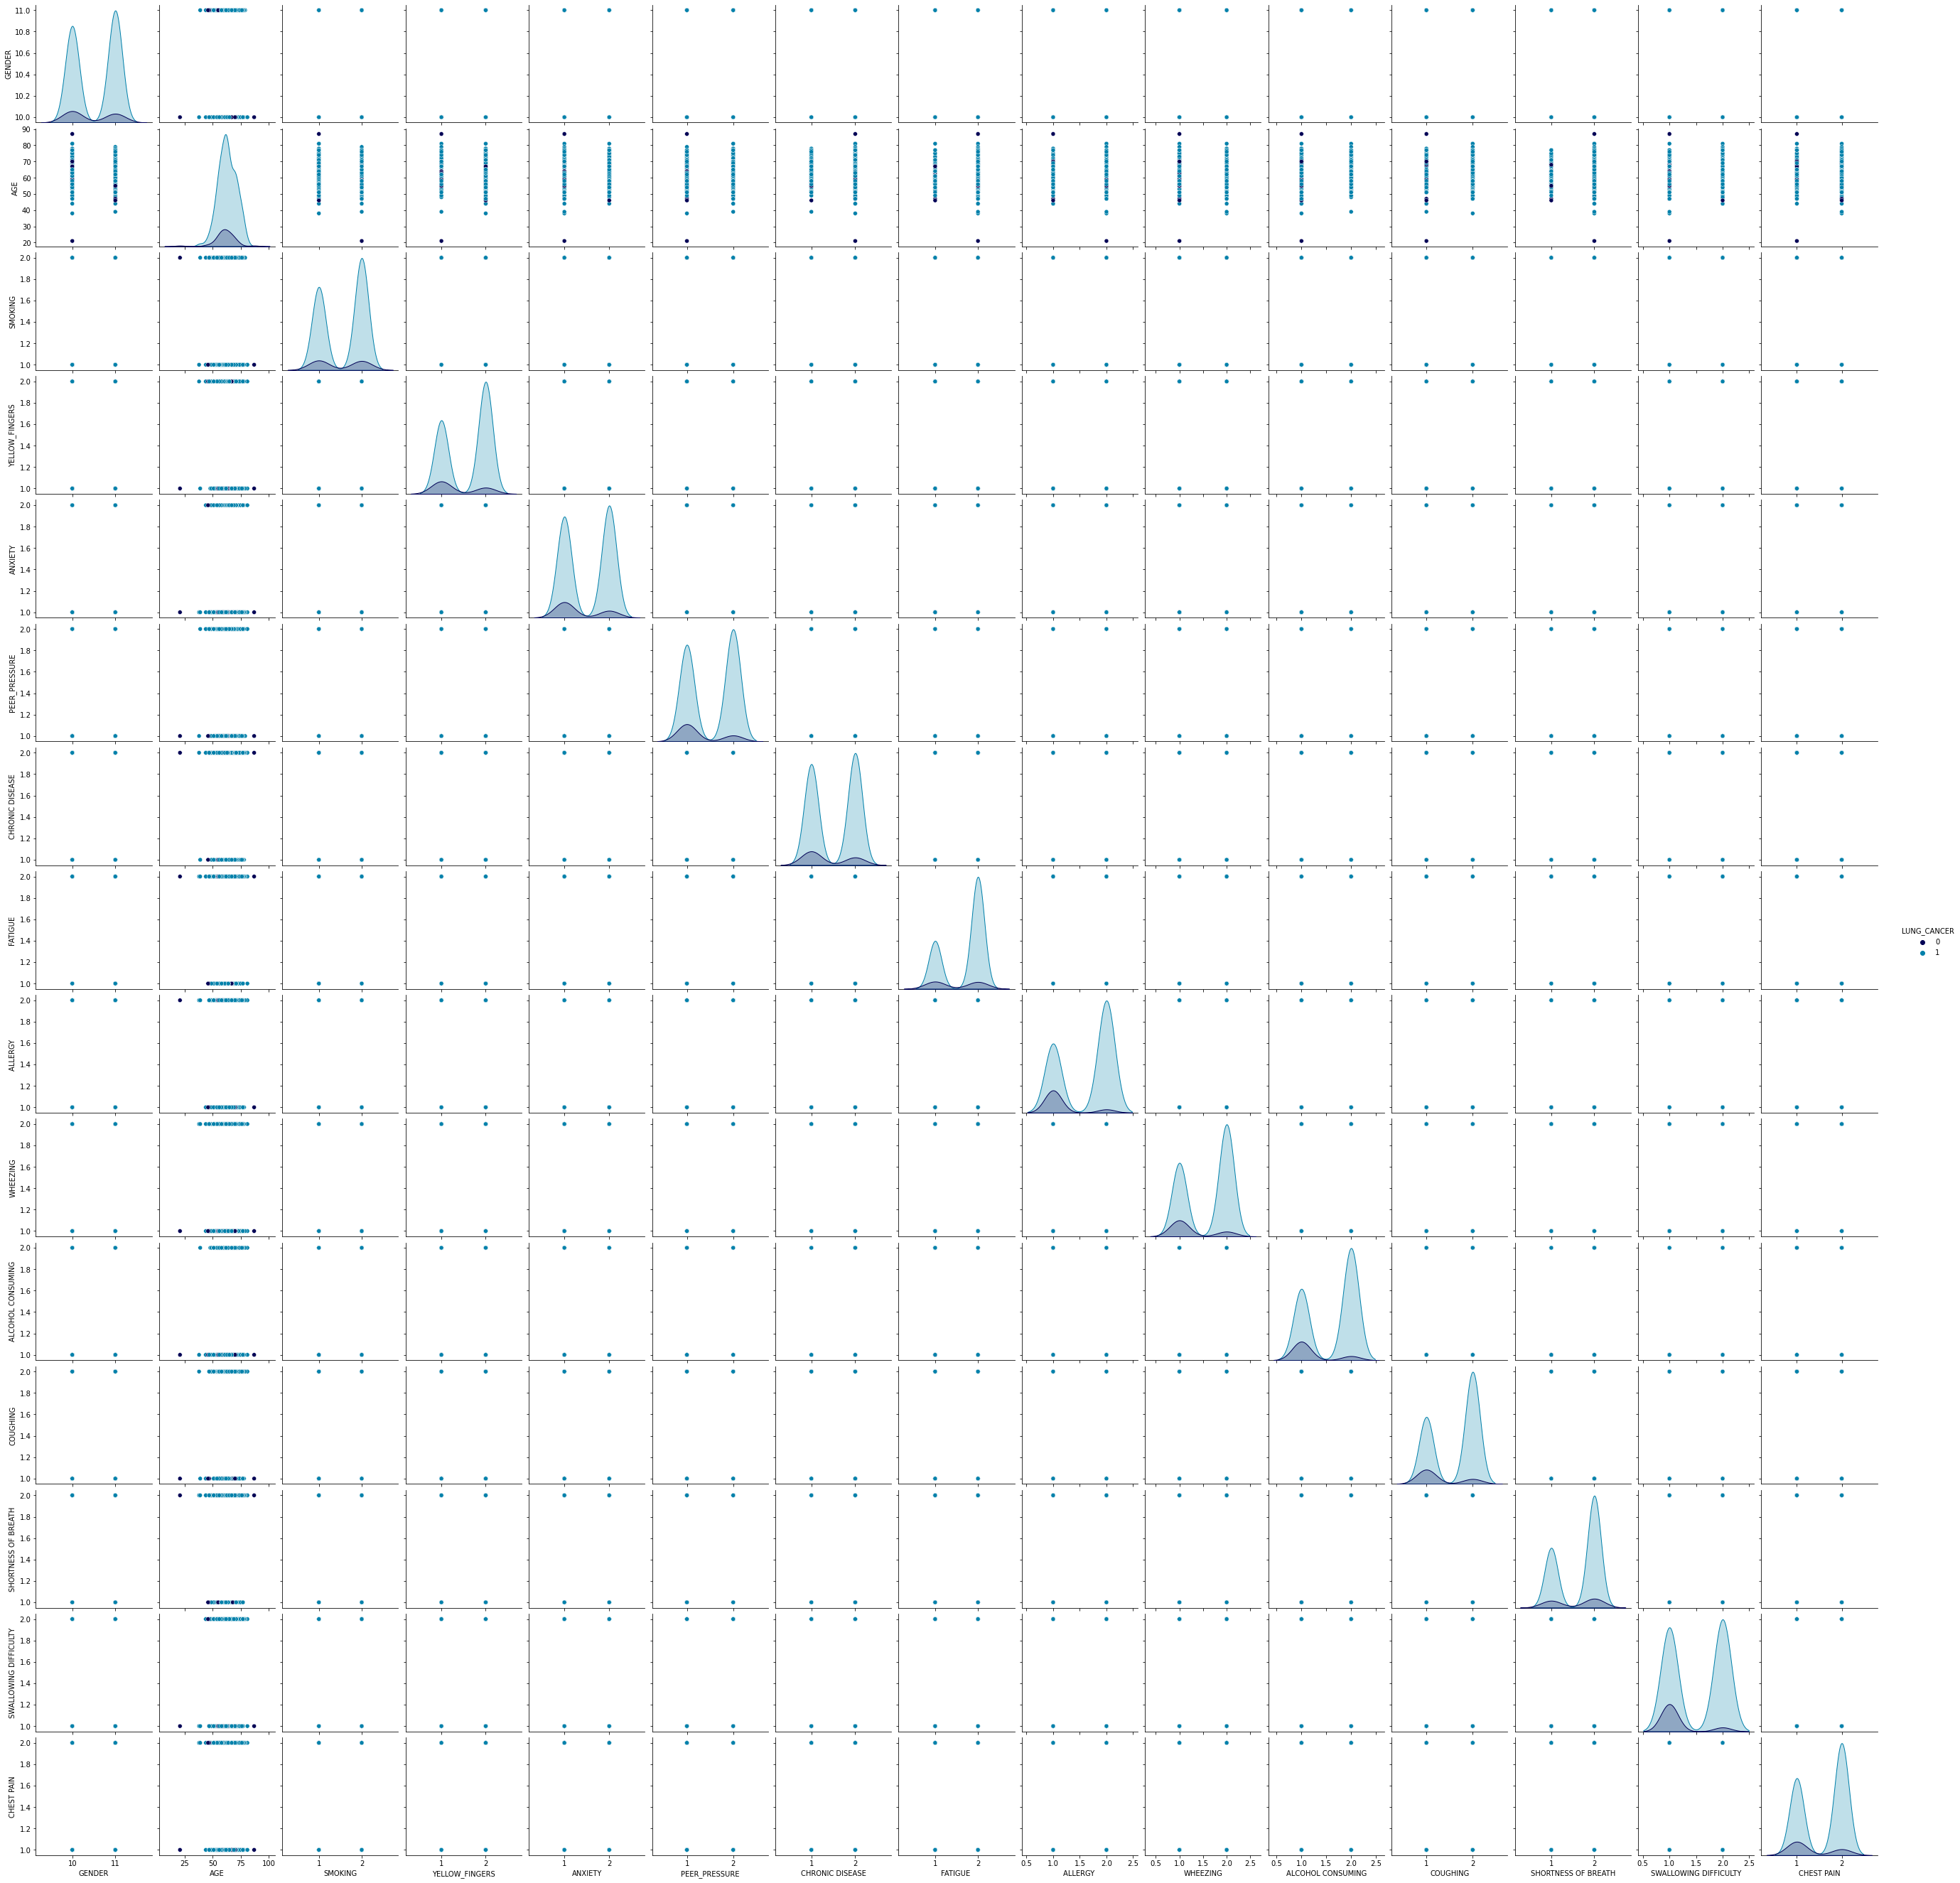

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(dataset, hue="LUNG_CANCER", palette="ocean",diag_kind="kde")

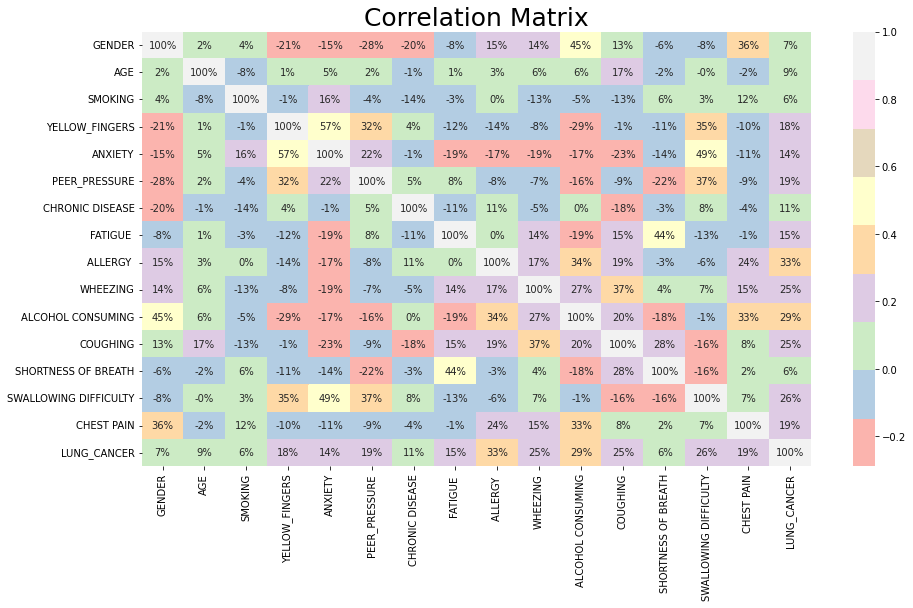

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,fmt=".0%",cmap='Pastel1')
plt.title('Correlation Matrix',size=25)
plt.show()

Data pre processing

In [ ]:
dataset['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

In [ ]:
labelencoder = LabelEncoder()
dataset['LUNG_CANCER'] = labelencoder.fit_transform(dataset['LUNG_CANCER'])

In [ ]:
X = dataset.drop(['LUNG_CANCER'], axis=1)
y = dataset.loc[:,['LUNG_CANCER']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (247, 15)
Shape of X_test:  (62, 15)
Shape of y_train:  (247, 1)
Shape of y_test (62, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

Prediction Algorithms

Logistic Regression

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 87.09677419354838


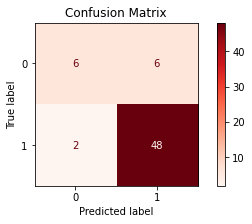

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model1, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

KNN Plot N-Neighbors

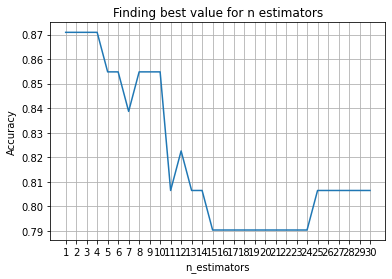

Highest value:  0.8709677419354839


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
X_axis= list(range (1, 31))
acc = pd.Series()
x = range (1,31)
for i in list (range (1, 31)):
  knn_model = KNeighborsClassifier (n_neighbors = i)
  knn_model.fit (X_train, y_train)
  prediction = knn_model.predict (X_test)
  acc = acc.append(pd. Series (metrics.accuracy_score (prediction, y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)

knn.fit (X_train, y_train)


KNeighborsClassifier(n_neighbors=24)

SVM

In [ ]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 83.87096774193549


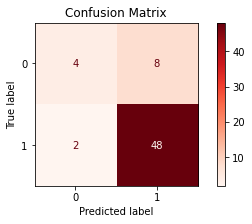

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model5, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Naive Bayes Classifier

In [ ]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 87.09677419354838


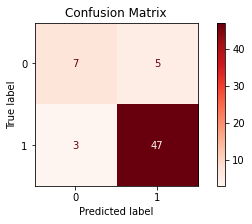

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model3, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Decision Tree Classifier

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 80.64516129032258


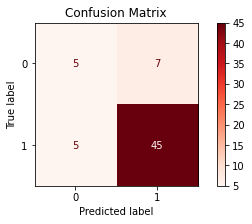

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model2, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Random Forest

In [ ]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 85.48387096774194


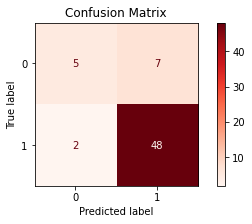

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model4, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Fine Tunning the Model

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [ ]:
model = RandomForestClassifier()

Applying Grid Search on Random Forest

In [ ]:
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time= 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             verbose=2)

In [ ]:
# Getting the Best Parameters for Random Forest
grid.best_params_

{'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
# Creating the model with the best params
finalmodel = RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=30)

In [ ]:
finalmodel.fit(X_train,y_train)
y_pred = finalmodel.predict(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
print('Final Accuracy Score = ' + str(score*100))

Final Accuracy Score = 83.87096774193549


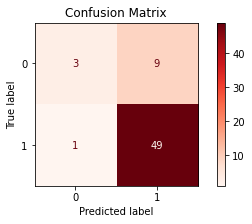

In [ ]:
class_names = [0,1]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(finalmodel, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

Cross Validation Score of the models

In [ ]:
def CrossValidationScore(model_list):
    global X,y

    mean = []
    modelname = []

    for model in model_list:
        modelname.append(type(model).__name__)

    for i in model_list:
        scores = cross_val_score(i, X, y, cv=5)
        mean.append(scores.mean())

    cvs = pd.DataFrame({"Model Name":modelname,"CVS":mean})
    return cvs.style.background_gradient("Reds")

In [ ]:
model_list=[model1,model2,model3,model4,model5,finalmodel]

In [ ]:
CrossValidationScore(model_list)

,Model Name,CVS
0,LogisticRegression,0.915918
1,DecisionTreeClassifier,0.873876
2,GaussianNB,0.903014
3,RandomForestClassifier,0.912745
4,SVC,0.873823
5,RandomForestClassifier,0.877049
